# Clustering

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

## K-Means

### toy-example (iris)

* 出動 iris 資料集吧

In [31]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [36]:
from sklearn.cluster import KMeans


X = df_data.drop("Species", axis = 1)
kmeansModel = KMeans(n_clusters=3, # 分 3 群
                     n_init = 10, # 起始值有10組，每組分完後，比 inertia，選最小的那組給你
                     random_state=46, # 產出 10 組起始值時，用的 seed
                    tol = 0.0001) # 前後兩次 iteration， centers 間的 歐式距離，小於 0.0001 就算收斂
kmeansModel.fit(X)
clusters_pred = kmeansModel.predict(X)

* 分群結果

In [37]:
clusters_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

* 各群的中心

In [38]:
kmeansModel.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

* inertia (within-group sum of variance)

In [39]:
kmeansModel.inertia_

78.85144142614601

* 選 k

In [41]:
kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list]

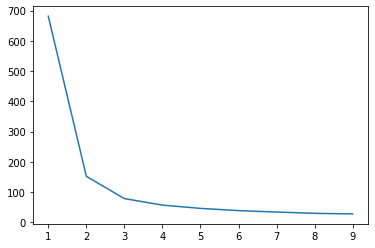

In [43]:
plt.plot(range(1,10), inertias);

* 可以看到，elbow 在 2 or 3，所以可以選 2 or 3 當分群的群數

* 詳細說明文件，看 `KMeans?`

In [32]:
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='auto',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should ta

### stock movement

* 這個應用蠻好玩的，我們可以對股票的 "走勢" 做分群。
* 資料如以下： 

In [19]:
movements = pd.read_csv("data/company-stock-movements.csv", index_col = 0)
movements.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


* 可以看到，每一列是一家公司，每一行是時間點，值是股價(大概做過一些調整了，所以有正有負，我們可以不用管他，就當是股價即可)
* 如果我今天要做的分群，是對絕對的數值做分群，那我就直接用這張表分群就好. 
* 但如果我今天是想對 "走勢" 做分群，那我會希望對 "列" 做標準化。
  * 舉例來說，台積電的股價變化是 600, 580, 600, 620, 640，啟基是 60, 58, 60, 62, 64。
  * 那從 "走勢" 來看，台積跟啟基走勢是一樣的，應該被分為一群，但如果直接做 kmeans，就再見了，因為光 600 和 60 的距離就很遠。  
  * 另外，台積股價的變化是 -20, 20, 20, 20; 啟基是 -2, 2, 2, 2，這個變動差距也不同，但如果改成看變化百分比(把股價放分母，變化當分子)，那兩邊就又差不多了. 
  * 所以，我如果先對列做標準化，那兩個公司的數值就都變成 [-0.39, -1.37, -0.39, 0.58, 1.56]，一模模一樣樣，euclidean distance 變成 0，分群時一定放在一塊兒
* 所以，這一個例子，我們就要對 "列" 做標準化，那就要用到 `Normalizer` 這個 preprocessor:

In [29]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline, make_pipeline

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [16]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 
                   'companies': movements.index})

# Display df sorted by cluster label
df.sort_values(["labels"])

,labels,companies
20,0,Home Depot
29,1,Lookheed Martin
36,1,Northrop Grumman
4,1,Boeing
58,2,Xerox
16,2,General Electrics
0,2,Apple
33,3,Microsoft
51,3,Texas instruments
50,3,Taiwan Semiconductor Manufacturing
